# OpenAI API를 이용한 임베딩 활용 예제(Use cases)

## 작성자 : AISchool ( https://www.udemy.com/course/llm-part-1-llama-2-fine-tuning/?referralCode=32804C68FEF005E82BCF )
### Reference : https://platform.openai.com/docs/guides/embeddings/use-cases

# 1. 임베딩 얻기(Obtaining the embeddings)

In [ ]:
!pip install openai pandas transformers plotly matplotlib scikit-learn torch torchvision scipy tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


In [ ]:
import pandas as pd
import tiktoken

## OpenAI API Key 설정

In [ ]:
OPENAI_KEY = "여러분의_OPENAI_API_KEY"

## OpenAI API를 이용해서 Embedding을 수행하는 함수 정의

In [ ]:
from openai import OpenAI
client = OpenAI(api_key=OPENAI_KEY)

def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

## 아마존 식품 리뷰 데이터셋 다운로드 하기
### Reference : https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

In [ ]:
!wget https://raw.githubusercontent.com/openai/openai-cookbook/main/examples/data/fine_food_reviews_1k.csv -O fine_food_reviews_1k.csv

--2023-12-22 05:41:52--  https://raw.githubusercontent.com/openai/openai-cookbook/main/examples/data/fine_food_reviews_1k.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 436148 (426K) [text/plain]
Saving to: ‘fine_food_reviews_1k.csv’

fine_food_reviews_1 100%[===================>] 425.93K  --.-KB/s    in 0.04s   

2023-12-22 05:41:52 (10.7 MB/s) - ‘fine_food_reviews_1k.csv’ saved [436148/436148]



# 데이터 불러오기 & 전처리

In [ ]:
# 전체 568,454개 데이터 중에서 가장 최근 1000개만 가져옴
input_datapath = "./fine_food_reviews_1k.csv"  # to save space, we provide a pre-filtered dataset
df = pd.read_csv(input_datapath, index_col=0)
df = df[["Time", "ProductId", "UserId", "Score", "Summary", "Text"]]
df = df.dropna()
df["combined"] = (
    "Title: " + df.Summary.str.strip() + "; Content: " + df.Text.str.strip()
)
df.head(2)

,Time,ProductId,UserId,Score,Summary,Text,combined
0,1351123200,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...
1,1351123200,B003JK537S,A3JBPC3WFUT5ZP,1,Arrived in pieces,"Not pleased at all. When I opened the box, mos...",Title: Arrived in pieces; Content: Not pleased...


In [ ]:
df.shape

(1000, 7)

# 1000개의 식품리뷰 데이터에 대한 임베딩값 얻기

In [ ]:
df['ada_embedding'] = df.combined.apply(lambda x: get_embedding(x, model='text-embedding-ada-002'))
df.to_csv('embedded_1k_reviews.csv', index=False)

In [ ]:
df

,Time,ProductId,UserId,Score,Summary,Text,combined
0,1351123200,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...
1,1351123200,B003JK537S,A3JBPC3WFUT5ZP,1,Arrived in pieces,"Not pleased at all. When I opened the box, mos...",Title: Arrived in pieces; Content: Not pleased...
2,1351123200,B000JMBE7M,AQX1N6A51QOKG,4,"It isn't blanc mange, but isn't bad . . .",I'm not sure that custard is really custard wi...,"Title: It isn't blanc mange, but isn't bad . ...."
3,1351123200,B004AHGBX4,A2UY46X0OSNVUQ,3,These also have SALT and it's not sea salt.,I like the fact that you can see what you're g...,Title: These also have SALT and it's not sea s...
4,1351123200,B001BORBHO,A1AFOYZ9HSM2CZ,5,Happy with the product,My dog was suffering with itchy skin. He had ...,Title: Happy with the product; Content: My dog...
...,...,...,...,...,...,...,...
995,1351209600,B004OQLIHK,AKHQMSUORSA91,5,Delicious!,I have ordered these raisins multiple times. ...,Title: Delicious!; Content: I have ordered the...
996,1351209600,B0006349W6,A21BT40VZCCYT4,5,Good Training Treat,My dog will come in from outside when I am tra...,Title: Good Training Treat; Content: My dog wi...
997,1351209600,B00611F084,A6D4ND3C3BCYV,5,Jamica Me Crazy Coffee,Wolfgang Puck's Jamaica Me Crazy is that wonde...,Title: Jamica Me Crazy Coffee; Content: Wolfga...
998,1351209600,B005QKH5HA,A3LR9HCV3D96I3,5,Party Peanuts,Great product for the price. Mix with the Asia...,Title: Party Peanuts; Content: Great product f...


In [ ]:
df.iloc[0]['ada_embedding']

'[0.007060592994093895, -0.02732112631201744, 0.010580576956272125, -0.014588683843612671, 0.004358730278909206, 0.019923659041523933, 0.0006634345045313239, -0.02212364971637726, -0.01926366239786148, -0.013578063808381557, 0.018067417666316032, 0.004080294165760279, -0.032944850623607635, 0.00016059498011600226, 0.015798678621649742, 0.019414912909269333, 0.017888668924570084, -0.026317380368709564, -0.019387412816286087, -0.025107385590672493, -0.047382283955812454, -0.00719809252768755, 0.023828642442822456, -0.008463086560368538, -0.008923709392547607, 0.011433073319494724, 0.02945236675441265, -0.02250864915549755, -0.010174954310059547, 0.02161490172147751, 0.001189369591884315, 0.00905433390289545, -0.013364939950406551, -0.017421171069145203, -0.005912473425269127, -0.01095182541757822, -0.02648238092660904, 0.007328717038035393, 0.022481149062514305, -0.02023990824818611, 0.01907116360962391, -0.015303680673241615, 0.009205583482980728, -0.00831183698028326, 0.001719601568765

In [ ]:
from google.colab import files
files.download('embedded_1k_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. 2D로 데이터 시각화하기 (Data visualization in 2D)

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
from ast import literal_eval

# Load the embeddings
datafile_path = "embedded_1k_reviews.csv"
df = pd.read_csv(datafile_path)

# Convert to a list of lists of floats
matrix = np.array(df.ada_embedding.apply(literal_eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

(1000, 2)

Text(0.5, 1.0, 'Amazon ratings visualized in language using t-SNE')

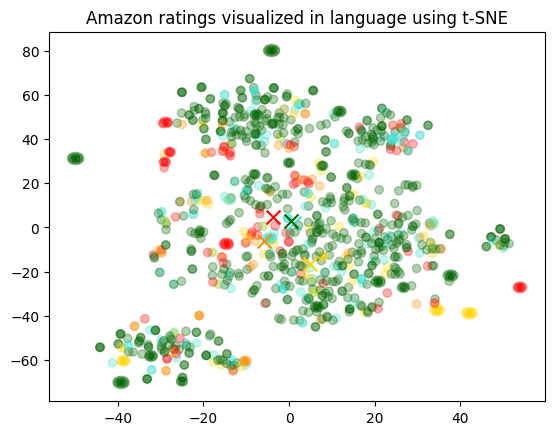

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
color_indices = df.Score.values - 1

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
for score in [0,1,2,3,4]:
    avg_x = np.array(x)[df.Score-1==score].mean()
    avg_y = np.array(y)[df.Score-1==score].mean()
    color = colors[score]
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)

plt.title("Amazon ratings visualized in language using t-SNE")

# 3. 임베딩값을 ML 알고리즘의 feature로 활용하기 (Embedding as a text feature encoder for ML algorithms) (Regression)

In [ ]:
import pandas as pd
import numpy as np
from ast import literal_eval

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

datafile_path = "embedded_1k_reviews.csv"

df = pd.read_csv(datafile_path)
df["embedding"] = df.ada_embedding.apply(literal_eval).apply(np.array)

X_train, X_test, y_train, y_test = train_test_split(list(df.embedding.values), df.Score, test_size=0.2, random_state=42)

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
preds = rfr.predict(X_test)

mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)

print(f"ada-002 embedding performance on 1k Amazon reviews: mse={mse:.2f}, mae={mae:.2f}")

ada-002 embedding performance on 1k Amazon reviews: mse=0.55, mae=0.50


In [ ]:
y_test

521    5
737    5
740    5
660    5
411    5
      ..
408    5
332    4
208    5
613    4
78     5
Name: Score, Length: 200, dtype: int64

In [ ]:
preds

array([4.7 , 4.65, 4.9 , 5.  , 4.21, 4.77, 5.  , 4.8 , 4.75, 4.45, 4.61,
       4.25, 4.55, 1.04, 4.28, 4.75, 4.29, 3.18, 4.94, 3.25, 4.41, 4.85,
       2.79, 5.  , 4.98, 4.6 , 4.8 , 4.92, 4.82, 3.95, 4.08, 2.05, 4.99,
       3.52, 4.89, 4.05, 4.12, 5.  , 2.46, 4.62, 3.8 , 4.38, 1.06, 4.61,
       4.39, 2.59, 4.93, 4.76, 2.69, 4.8 , 4.17, 4.92, 4.88, 4.45, 4.98,
       4.76, 4.35, 4.8 , 4.84, 5.  , 1.15, 4.4 , 4.84, 4.41, 4.62, 4.  ,
       3.41, 4.79, 4.33, 4.79, 3.8 , 2.3 , 4.7 , 4.62, 4.65, 3.53, 4.12,
       4.41, 4.75, 4.18, 2.26, 5.  , 4.76, 4.76, 4.  , 2.28, 4.62, 4.9 ,
       4.78, 4.74, 1.06, 4.98, 4.7 , 3.66, 4.67, 3.97, 4.78, 4.82, 3.93,
       3.2 , 4.21, 4.35, 2.66, 2.79, 4.92, 2.76, 2.41, 4.41, 4.  , 2.71,
       4.9 , 4.95, 4.72, 4.8 , 4.36, 4.04, 4.22, 4.51, 4.53, 1.3 , 4.15,
       1.86, 4.9 , 5.  , 4.88, 3.58, 4.78, 4.92, 5.  , 3.39, 5.  , 5.  ,
       4.83, 4.84, 5.  , 2.67, 2.73, 4.46, 4.93, 4.65, 4.67, 4.03, 4.05,
       4.94, 4.7 , 5.  , 4.44, 4.84, 4.99, 2.01, 4.

In [ ]:
bmse = mean_squared_error(y_test, np.repeat(y_test.mean(), len(y_test)))
bmae = mean_absolute_error(y_test, np.repeat(y_test.mean(), len(y_test)))
print(
    f"Dummy mean prediction performance on Amazon reviews: mse={bmse:.2f}, mae={bmae:.2f}"
)

Dummy mean prediction performance on Amazon reviews: mse=1.81, mae=1.08


# 4. 임베딩값을 feature로 분류 수행하기(Classification using the embedding features)


In [ ]:
import pandas as pd
import numpy as np
from ast import literal_eval

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# load data
datafile_path = "embedded_1k_reviews.csv"

df = pd.read_csv(datafile_path)
df["embedding"] = df.ada_embedding.apply(literal_eval).apply(np.array)  # convert string to array

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    list(df.embedding.values), df.Score, test_size=0.2, random_state=42
)

# train random forest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

           1       0.89      0.44      0.59        18
           2       1.00      0.35      0.52        17
           3       1.00      0.12      0.22         8
           4       0.90      0.35      0.50        26
           5       0.75      1.00      0.86       131

    accuracy                           0.78       200
   macro avg       0.91      0.45      0.54       200
weighted avg       0.82      0.78      0.73       200



In [ ]:
y_test

521    5
737    5
740    5
660    5
411    5
      ..
408    5
332    4
208    5
613    4
78     5
Name: Score, Length: 200, dtype: int64

In [ ]:
preds

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 4, 5, 1, 5, 5, 5, 5, 5, 5, 2, 5, 4, 5, 1, 5,
       5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 4, 2, 5, 5,
       5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 4, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5,
       4, 5])

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve

def plot_multiclass_precision_recall(
    y_score, y_true_untransformed, class_list, classifier_name
):
    """
    Precision-Recall plotting for a multiclass problem. It plots average precision-recall, per class precision recall and reference f1 contours.

    Code slightly modified, but heavily based on https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
    """
    n_classes = len(class_list)
    y_true = pd.concat(
        [(y_true_untransformed == class_list[i]) for i in range(n_classes)], axis=1
    ).values

    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(y_true[:, i], y_score[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision_micro, recall_micro, _ = precision_recall_curve(
        y_true.ravel(), y_score.ravel()
    )
    average_precision_micro = average_precision_score(y_true, y_score, average="micro")
    print(
        str(classifier_name)
        + " - Average precision score over all classes: {0:0.2f}".format(
            average_precision_micro
        )
    )

    # setup plot details
    plt.figure(figsize=(9, 10))
    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
        plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

    lines.append(l)
    labels.append("iso-f1 curves")
    (l,) = plt.plot(recall_micro, precision_micro, color="gold", lw=2)
    lines.append(l)
    labels.append(
        "average Precision-recall (auprc = {0:0.2f})" "".format(average_precision_micro)
    )

    for i in range(n_classes):
        (l,) = plt.plot(recall[i], precision[i], lw=2)
        lines.append(l)
        labels.append(
            "Precision-recall for class `{0}` (auprc = {1:0.2f})"
            "".format(class_list[i], average_precision[i])
        )

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{classifier_name}: Precision-Recall curve for each class")
    plt.legend(lines, labels)

RandomForestClassifier() - Average precision score over all classes: 0.87


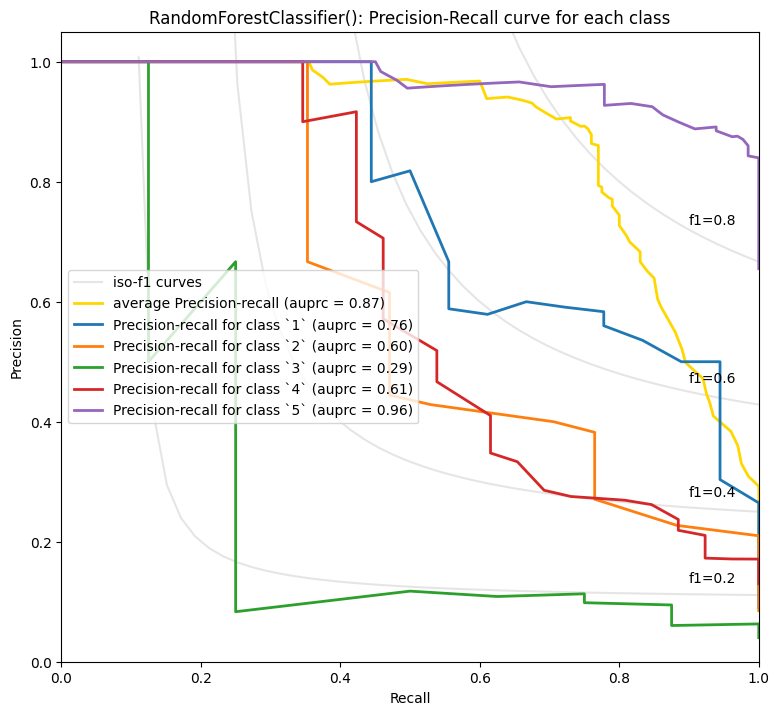

In [ ]:
plot_multiclass_precision_recall(probas, y_test, [1, 2, 3, 4, 5], clf)

# 5. 제로샷 분류(Zero-shot classification)

In [ ]:
import pandas as pd
import numpy as np
from ast import literal_eval

from sklearn.metrics import classification_report

# parameters
EMBEDDING_MODEL = "text-embedding-ada-002"

# load data
datafile_path = "./embedded_1k_reviews.csv"

df = pd.read_csv(datafile_path)
df["embedding"] = df.ada_embedding.apply(literal_eval).apply(np.array)

# convert 5-star rating to binary sentiment
df = df[df.Score != 3]
df["sentiment"] = df.Score.replace({1: "negative", 2: "negative", 4: "positive", 5: "positive"})

<ipython-input-23-917ee8d814a9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"] = df.Score.replace({1: "negative", 2: "negative", 4: "positive", 5: "positive"})


In [ ]:
df

,Time,ProductId,UserId,Score,Summary,Text,combined,ada_embedding,embedding,sentiment
0,1351123200,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...,"[0.007060592994093895, -0.02732112631201744, 0...","[0.007060592994093895, -0.02732112631201744, 0...",positive
1,1351123200,B003JK537S,A3JBPC3WFUT5ZP,1,Arrived in pieces,"Not pleased at all. When I opened the box, mos...",Title: Arrived in pieces; Content: Not pleased...,"[-0.023609420284628868, -0.011784634552896023,...","[-0.023609420284628868, -0.011784634552896023,...",negative
2,1351123200,B000JMBE7M,AQX1N6A51QOKG,4,"It isn't blanc mange, but isn't bad . . .",I'm not sure that custard is really custard wi...,"Title: It isn't blanc mange, but isn't bad . ....","[0.00016697357932571322, 0.005226491950452328,...","[0.00016697357932571322, 0.005226491950452328,...",positive
4,1351123200,B001BORBHO,A1AFOYZ9HSM2CZ,5,Happy with the product,My dog was suffering with itchy skin. He had ...,Title: Happy with the product; Content: My dog...,"[0.015255776233971119, -0.003898625960573554, ...","[0.015255776233971119, -0.003898625960573554, ...",positive
5,1351123200,B008PSM0BQ,A3OUFIMGL2K6RS,4,Good Sauce,This is a good all purpose sauce. Has good fl...,Title: Good Sauce; Content: This is a good all...,"[-0.016170555725693703, 0.005940747447311878, ...","[-0.016170555725693703, 0.005940747447311878, ...",positive
...,...,...,...,...,...,...,...,...,...,...
995,1351209600,B004OQLIHK,AKHQMSUORSA91,5,Delicious!,I have ordered these raisins multiple times. ...,Title: Delicious!; Content: I have ordered the...,"[-0.008766233921051025, -0.01863405480980873, ...","[-0.008766233921051025, -0.01863405480980873, ...",positive
996,1351209600,B0006349W6,A21BT40VZCCYT4,5,Good Training Treat,My dog will come in from outside when I am tra...,Title: Good Training Treat; Content: My dog wi...,"[-0.024528082460165024, -0.017596233636140823,...","[-0.024528082460165024, -0.017596233636140823,...",positive
997,1351209600,B00611F084,A6D4ND3C3BCYV,5,Jamica Me Crazy Coffee,Wolfgang Puck's Jamaica Me Crazy is that wonde...,Title: Jamica Me Crazy Coffee; Content: Wolfga...,"[-0.016790105029940605, -0.005199245177209377,...","[-0.016790105029940605, -0.005199245177209377,...",positive
998,1351209600,B005QKH5HA,A3LR9HCV3D96I3,5,Party Peanuts,Great product for the price. Mix with the Asia...,Title: Party Peanuts; Content: Great product f...,"[-0.010757419280707836, -0.016502324491739273,...","[-0.010757419280707836, -0.016502324491739273,...",positive


## cosine similarity 정의

In [ ]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

0      positive
1      negative
2      negative
4      positive
5      positive
         ...   
995    positive
996    positive
997    positive
998    positive
999    positive
Name: embedding, Length: 925, dtype: object
0      positive
1      negative
2      positive
4      positive
5      positive
         ...   
995    positive
996    positive
997    positive
998    positive
999    positive
Name: sentiment, Length: 925, dtype: object
              precision    recall  f1-score   support

    negative       0.61      0.88      0.72       136
    positive       0.98      0.90      0.94       789

    accuracy                           0.90       925
   macro avg       0.79      0.89      0.83       925
weighted avg       0.92      0.90      0.91       925



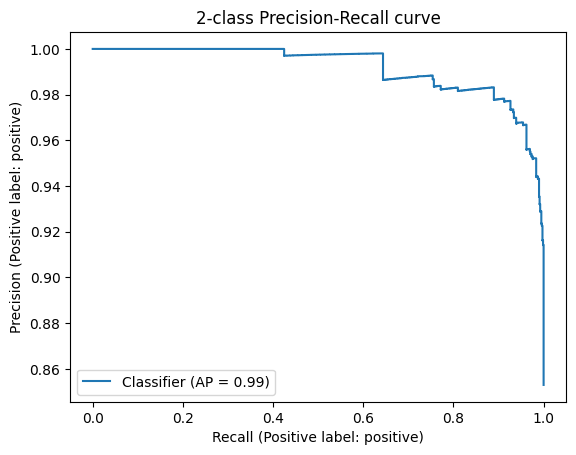

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

def evaluate_embeddings_approach(
    labels = ['negative', 'positive'],
    model = EMBEDDING_MODEL,
):
    label_embeddings = [get_embedding(label, model=model) for label in labels]

    # 값이 크면 positive에 가까움 값이 작으면 negative에 가까움
    def label_score(review_embedding, label_embeddings):
        return cosine_similarity(review_embedding, label_embeddings[1]) - cosine_similarity(review_embedding, label_embeddings[0])

    probas = df["embedding"].apply(lambda x: label_score(x, label_embeddings))
    preds = probas.apply(lambda x: 'positive' if x>0 else 'negative')

    report = classification_report(df.sentiment, preds)
    print(preds)
    print(df.sentiment)
    print(report)

    display = PrecisionRecallDisplay.from_predictions(df.sentiment, probas, pos_label='positive')
    _ = display.ax_.set_title("2-class Precision-Recall curve")

evaluate_embeddings_approach(labels=['negative', 'positive'], model=EMBEDDING_MODEL)

## 제로샷 성능 개선하기

0      positive
1      negative
2      positive
4      positive
5      positive
         ...   
995    positive
996    positive
997    positive
998    positive
999    positive
Name: embedding, Length: 925, dtype: object
0      positive
1      negative
2      positive
4      positive
5      positive
         ...   
995    positive
996    positive
997    positive
998    positive
999    positive
Name: sentiment, Length: 925, dtype: object
              precision    recall  f1-score   support

    negative       0.98      0.73      0.84       136
    positive       0.96      1.00      0.98       789

    accuracy                           0.96       925
   macro avg       0.97      0.86      0.91       925
weighted avg       0.96      0.96      0.96       925



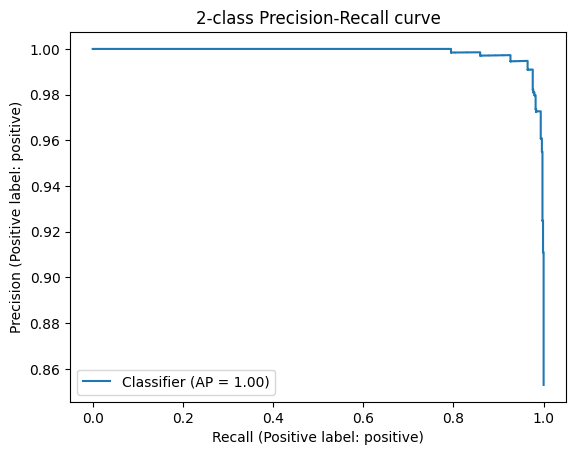

In [ ]:
evaluate_embeddings_approach(labels=['An Amazon review with a negative sentiment.', 'An Amazon review with a positive sentiment.'])

# 6. 클러스터링(Clustering)

In [ ]:
import numpy as np
import pandas as pd
from ast import literal_eval

# load data
datafile_path = "./embedded_1k_reviews.csv"

df = pd.read_csv(datafile_path)
df["embedding"] = df.ada_embedding.apply(literal_eval).apply(np.array)  # convert string to numpy array
matrix = np.vstack(df.embedding.values)
matrix.shape

(1000, 1536)

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
df["Cluster"] = labels

df.groupby("Cluster").Score.mean().sort_values()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
2    4.081560
1    4.191176
0    4.221805
3    4.344937
Name: Score, dtype: float64

In [ ]:
df

,Time,ProductId,UserId,Score,Summary,Text,combined,ada_embedding,embedding,Cluster
0,1351123200,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...,"[0.007060592994093895, -0.02732112631201744, 0...","[0.007060592994093895, -0.02732112631201744, 0...",2
1,1351123200,B003JK537S,A3JBPC3WFUT5ZP,1,Arrived in pieces,"Not pleased at all. When I opened the box, mos...",Title: Arrived in pieces; Content: Not pleased...,"[-0.023609420284628868, -0.011784634552896023,...","[-0.023609420284628868, -0.011784634552896023,...",2
2,1351123200,B000JMBE7M,AQX1N6A51QOKG,4,"It isn't blanc mange, but isn't bad . . .",I'm not sure that custard is really custard wi...,"Title: It isn't blanc mange, but isn't bad . ....","[0.00016697357932571322, 0.005226491950452328,...","[0.00016697357932571322, 0.005226491950452328,...",3
3,1351123200,B004AHGBX4,A2UY46X0OSNVUQ,3,These also have SALT and it's not sea salt.,I like the fact that you can see what you're g...,Title: These also have SALT and it's not sea s...,"[0.010522457771003246, -0.013484964147210121, ...","[0.010522457771003246, -0.013484964147210121, ...",3
4,1351123200,B001BORBHO,A1AFOYZ9HSM2CZ,5,Happy with the product,My dog was suffering with itchy skin. He had ...,Title: Happy with the product; Content: My dog...,"[0.015255776233971119, -0.003898625960573554, ...","[0.015255776233971119, -0.003898625960573554, ...",1
...,...,...,...,...,...,...,...,...,...,...
995,1351209600,B004OQLIHK,AKHQMSUORSA91,5,Delicious!,I have ordered these raisins multiple times. ...,Title: Delicious!; Content: I have ordered the...,"[-0.008766233921051025, -0.01863405480980873, ...","[-0.008766233921051025, -0.01863405480980873, ...",2
996,1351209600,B0006349W6,A21BT40VZCCYT4,5,Good Training Treat,My dog will come in from outside when I am tra...,Title: Good Training Treat; Content: My dog wi...,"[-0.024528082460165024, -0.017596233636140823,...","[-0.024528082460165024, -0.017596233636140823,...",1
997,1351209600,B00611F084,A6D4ND3C3BCYV,5,Jamica Me Crazy Coffee,Wolfgang Puck's Jamaica Me Crazy is that wonde...,Title: Jamica Me Crazy Coffee; Content: Wolfga...,"[-0.016790105029940605, -0.005199245177209377,...","[-0.016790105029940605, -0.005199245177209377,...",0
998,1351209600,B005QKH5HA,A3LR9HCV3D96I3,5,Party Peanuts,Great product for the price. Mix with the Asia...,Title: Party Peanuts; Content: Great product f...,"[-0.010757419280707836, -0.016502324491739273,...","[-0.010757419280707836, -0.016502324491739273,...",2


Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

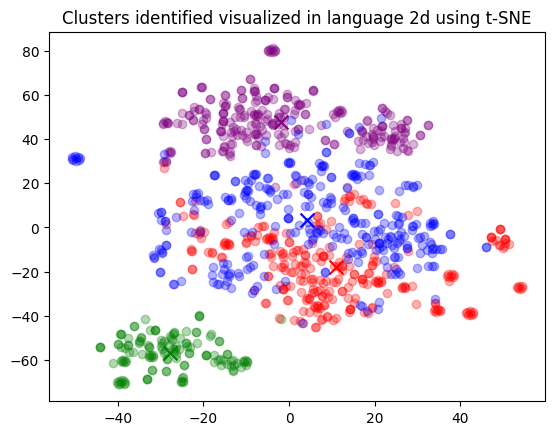

In [ ]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue"]):
    xs = np.array(x)[df.Cluster == category]
    ys = np.array(y)[df.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")

In [ ]:
# Reading a review which belong to each group.
rev_per_cluster = 5

for i in range(n_clusters):
    print(f"Cluster {i}\n", end=" ")

    sample_cluster_rows = df[df.Cluster == i].sample(rev_per_cluster, random_state=42)
    for j in range(rev_per_cluster):
        print(sample_cluster_rows.Score.values[j], end=", ")
        print(sample_cluster_rows.Summary.values[j], end=":   ")
        print(sample_cluster_rows.Text.values[j])

    print("-" * 100)

Cluster 0
 5, breakfast tea:   We switch to this decaf tea at night for a great cup of tea and no sleep problems. Thanks for a good cup of tea.
5, It is awesome.:   My partner is very happy with the tea, and is feeling much better since starting to drink it.<br />She has been drinking it both hot (normal) and iced (chilled) and likes the refreshing nature of it.
4, Chike!:   Just tried the orange and iced coffee this morning and really liked them both!  I am going to place my order today!
5, FAVORITE tea...:   Lipton makes the BEST French Vanilla tea...I have tried others and this is my favorite.  Just the right balance in the vanilla flavoring.  I buy it by the case as it is hard to find in stores - thankful Amazon is carrying.  LOVE this tea!
5, Twinings---a good cup of tea:   I have been drinking Twining's tea for years.  It used to be made in England but now they have a plant in North Carolina for the American trade.  The tea is excellent. I drink the decaf for health reasons and f

In [ ]:
# 클러스터 0
# 5, 아침 차: 저녁에는 이 디카페인 차로 바꿔 마시는데, 차 맛도 좋고 수면에 문제도 없어요. 좋은 차를 제공해주셔서 감사합니다.
# 5, 정말 대단해요.: 파트너가 이 차에 매우 만족하며, 이 차를 마시기 시작한 이후로 몸 상태가 훨씬 나아졌어요. 뜨겁게 또는 차갑게 마시는 것 모두 좋아하며, 그 상쾌함을 좋아해요.
# 4, 치케!: 오늘 아침에 오렌지와 아이스 커피를 처음 시도해봤는데 둘 다 매우 맛있었어요! 오늘 바로 주문할 거예요!
# 5, 내가 가장 좋아하는 차...: 리프톤이 만드는 프랑스 바닐라 차가 최고예요... 다른 것들도 시도해봤지만 이게 제일 좋아요. 바닐라 향이 딱 좋아요. 매장에서 찾기 힘들어서 케이스로 구입해요 - 아마존에서 판매하는 걸 다행으로 여겨요. 이 차 너무 좋아요!
# 5, 트와이닝스---좋은 차 한 잔: 저는 몇 년 동안 트와이닝스 차를 마셔왔어요. 예전에는 영국에서 만들었지만, 이제는 미국 노스캐롤라이나에 공장이 있어요. 차 맛이 훌륭해요. 건강상의 이유로 디카페인을 마시지만, 일반 차만큼 맛있다고 느껴요.

In [ ]:
# 클러스터 1
# 5, 개들이 너무 좋아해요.: 이것은 저녁 식사 후에 주는 "완전히 다 먹는" 간식이에요. 개들이 이 간식을 위해 일하고, 손을 잃을 뻔한 적도 있어요. 이제 개들은 "부드럽게"라는 새 명령어를 알아요.
# 2, 내 개에게 이상한 구토 반응을 일으켰어요: 이것들은 인간 간식처럼 냄새가 나서 좋아요...블루베리, 맛있어요. 개에게 "진짜" 간식을 주고 싶어서 이것과 다른 과일류 소프트 츄 하나를 줬어요. 며칠 후, 개가 위장의 모든 것을 토해내는 걸 보고 충격을 받았어요. 3번 정도 토했고, 그 후에도 점액과 담즙을 계속 토했어요. 불쾌하고 정말 안타까워요. 과일류와 아마존에 연락했고, 두 곳 모두 개봉된 봉지를 반품 받아주셨어요. 저희 개가 이 간식에 특별한 민감성이 있는 것 같아요. 다른 사람들은 더 좋은 경험을 하시길 바랍니다.
# 4, 매우 편리해요: 온라인으로 무엇인가를 주문하기 전에 가능한 한 많이 조사해봐요. 포장에 대한 많은 불만이 있어서, 배달될 때 박스에서 모래가 쏟아졌다고 해요. 아마존에서 매달 구독하는 경우 다른 아마존 박스에 40파운드 모래 박스를 넣어 배송해요. 저희 집에도 조금 쏟아졌지만, 그냥 다시 원래 박스에 넣었어요. 구독은 돈을 절약하고, 매달 집으로 배송되니 편리해요. 배송비도 무료이고요. 40파운드를 드는 건 저에게 문제가 아니지만, 제 여자친구는 무료 배송을 매우 감사해해요.
# 5, 이것들은 아마존에서 훌륭하고 가격도 좋아요: 이 늙은 강아지 [치와와]는 몇 년 동안 이것들을 먹어왔어요 [보여진 베이컨 스트립처럼] 그리고 제 나이가 들어도 아직 이것들을 씹는 데 문제가 없어요 - 카라멜 스퀘어도 매우 맛있어요 - 하지만 나이가 들어서 그런 것들은 먹지 않아요. 이것들이 아마존 구독과 절약 아래에 있는 걸 보니 좋네요 - 한동안 대형 상점에서 50온스짜리를 샀지만 종종 품절이 되곤 해요.
# 4, 훌륭한 음식이에요!: 피부 문제가 있는 강아지를 위한 음식을 찾고 있었어요. 이 음식으로 바꾸고 나서 피부가 많이 좋아졌어요. 여전히 조금 긁지만, 음식을 좋아해요. 리콜이 없고, 미국산 재료로 미국에서 만들어진 것이 큰 장점이에요 (중국산 독극물 음식은 없어요). 가격이 조금 비싸긴 하지만, 그는 작은 개라 음식이 오래 가요. 이제 안전하다고 느껴져서 이 라인의 다른 맛으로 식단을 다양화할 수 있어요.

In [ ]:
# 클러스터 2
# 5, 좋은 품질, 빠른 배송: 집에서 만든 바닐라를 만들기 위해 이것들을 샀어요. 콩의 품질이 매우 좋았어요. "육질"이 좋고 콩이 많았어요. 배송도 매우 빨랐고, 진공 포장되어 잘 도착했어요. 이 판매자에게 다시 구매할 거예요.
# 5, 안타깝게도 이 제품을 더 이상 찾을 수 없어요!: 이것들은 코스트코에서 판매되던 건강한 크래커였어요 - 하지만 갑자기 사라졌어요. 회사가 제품의 공식과 포장을 바꾼 것 같아요 (웹사이트에서 판단했어요). 인기 있고 맛있는 제품이었는데, 코스트코에서 사라져서 안타까워요. 어쩌면 커클랜드가 이 제품을 프라이빗 라벨로 고려해볼 수도 있겠네요 :-) 어쨌든 이 제품이 곧 다시 나오길 바래요!!!
# 5, 글루텐 프리 키드: 루시의 쿠키를 너무 좋아해요! 메이플 블리스가 정말 좋은데, 찾기가 너무 어려워요. 주문한 것을 금방 다 먹어치웠고, 곧 다시 주문할 거예요.
# 5, 글루텐 프리 건강 바, 아마존에서 주문하며 돈 절약: 이 킨드 바가 너무 맛있고 건강하며 글루텐 프리예요. 제 딸이 이것들을 발견하고 수업과 일로 바쁜 일정 사이에 빠른 간식으로 좋아해요. 대부분의 경우 제대로 된 식사를 할 시간이 없어서 이것들이 패스트푸드보다 훌륭한 대안이에요. 다시 주문할 거예요, 그리고 이번에는 몇 개를 제게도 주문할 거예요! 코코넛도 정말 좋아했어요..
# 5, 모든 면에서 훌륭해요!!!!: 아몬드 맛이 좋아요. 아몬드에 묻은 다크 초콜릿이 맛을 더 좋게 해줘요. 아몬드와 다크 초콜릿은 모두 심장에 좋은 음식이에요, 제가 찾던 것을 좋은 가격에 얻었어요..... 승리해요!!!!!!!!

In [ ]:
# 클러스터 3
# 5, 이 수도꼭지를 사랑해요: 이 수도꼭지를 정말 좋아합니다. 남편이 우리의 이전 집에 같은 것을 설치했기 때문에, 현재 수도꼭지가 샐 때, 그것을 고치지 말고 같은 것을 다시 사자고 했어요. 그는 설치하기 쉬웠지만 몇 번은 제 도움이 필요했어요. 외관도 좋고 작동도 잘 해요.
# 4, 전자레인지 저녁식사로 괜찮아요: Barilla Mezze Penne와 매운 마리나라 소스는 준비하기 쉽고 비슷한 제품보다 맛이 좋습니다. 소스는 생각했던 것만큼 맵지 않지만 맛있는 토마토 맛이 있습니다. 소스는 파스타와 분리되어 있으며 요리 후에 섞어야 합니다.
# 3, 괜찮지만 내가 생각했던 것과는 다르네요: 이것은 기본적으로 완두콩, 렌틸콩 그리고 작은 수프용 파스타입니다. 더 많은 건조 채소나 어떤 종류의 향신료를 찾을 것으로 기대했는데, 이것은 매우 간단한 베이스로 여러분이 수프를 만들어나갈 것입니다. '완두콩 수프 베이스'나 '완두콩과 파스타'라는 더 정확한 이름이 좋을 것 같아요. 이름과 설명이 더 정확하다면 더 높은 평점을 줬을 텐데, 주문 받았을 때 조금 오도된 느낌이 들어서요.
# 5, 훌륭하지만 가격은?: 처음 이 제품에 대해 America's Test Kitchen에서 들었을 때, 이탈리아 프리미엄 브랜드와의 맹목적인 맛 테스트에서 승리했다고 해서 시도해 봤습니다. 그리고 오늘날까지도 훌륭하다는 것을 확인했습니다. 하지만 아마존 가격은 이해할 수 없어요, 매장 가격 $7.49에 비해 $18.88이라니요. 게다가, 전혀 이해할 수 없는 이유로, 매장에서 추가로 $3.50을 할인해서 최종 가격이 $3.99가 되었습니다. 그리고 예상되는 질문에 대비해서, '유통 기한'을 확인했는데 2013년 말까지예요. 할인이 없더라도, $7.49의 정가는 아마존에 비하면 특가입니다. 그리고 이것은 좋은 올리브 오일입니다, 올리브는 캘리포니아에서 재배되고 수확되며 현장에서 가공됩니다.
# 5, 방부제가 없어서 아기에게 완벽하게 신선해요: 저는 건강하지 않은 아기의 자랑스러운 엄마입니다. 아기가 견딜 수 있는 깨끗한 음식을 찾는 것이 큰 도전이었습니다. 우리는 모든 유기농 아기 음식 브랜드를 시도해 봤지만 모두 실망스러웠습니다. 그들은 신선함을 유지하기 위해 첨가된 구연산과 아스코르브산(비타민 C)이 들어 있었고 우리 아들은 그것에 민감했습니다. 우리는 신선한 냉동식품에 대해 전혀 몰랐고 Yummy Spoonfuls를 발견하게 되어 기뻤습니다. 집에서 만들듯이 신선하게 만들어진 아기 음식이 구연산과 아스코르브산이 첨가되지 않을 수 있다는 것을, 나는 실제로 생각해 본 적도 없었습니다. 오 마이 갓, 이게 바로 음식이 맛있어야 하는 방법이에요. 완두콩, 고구마, 사과, 호박 모두 아기 음식처럼 맛이 나지 않습니다. 우리 아기들을 위해 신선한 음식을 만들어 주셔서 정말 감사합니다. 이게 바로 아기 음식의 기준이에요. <br /><br />저는 행복한 엄마입니다.

# 7. 임베딩을 이용한 텍스트 검색(Semantic text search using embeddings)

In [ ]:
import pandas as pd
import numpy as np
from ast import literal_eval

datafile_path = "./embedded_1k_reviews.csv"

df = pd.read_csv(datafile_path)
df["embedding"] = df.ada_embedding.apply(literal_eval).apply(np.array)

In [ ]:
# search through the reviews for a specific product
def search_reviews(df, product_description, n=3, pprint=True):
    product_embedding = get_embedding(
        product_description,
        model="text-embedding-ada-002"
    )
    df["similarity"] = df.embedding.apply(lambda x: cosine_similarity(x, product_embedding))

    results = (
        df.sort_values("similarity", ascending=False)
        .head(n)
        .combined.str.replace("Title: ", "")
        .str.replace("; Content:", ": ")
    )
    if pprint:
        for r in results:
            print(r)
            print()
    return results


results = search_reviews(df, "delicious beans", n=3)

Good Buy:  I liked the beans. They were vacuum sealed, plump and moist. Would recommend them for any use. I personally split and stuck them in some vodka to make vanilla extract. Yum!

Jamaican Blue beans:  Excellent coffee bean for roasting. Our family just purchased another 5 pounds for more roasting. Plenty of flavor and mild on acidity when roasted to a dark brown bean and before any oil appears on the bean itself (455F @ 17 minutes).

Delicious!:  I enjoy this white beans seasoning, it gives a rich flavor to the beans I just love it, my mother in law didn't know about this Zatarain's brand and now she is traying different seasoning and she likes it very much.<br />Thank you Amazon for having it because now I can't find it in stores, I like to have this 12 boxes because I can made it whenever my family want it.



In [ ]:
results = search_reviews(df, "whole wheat pasta", n=3)

Tasty and Quick Pasta:  Barilla Whole Grain Fusilli with Vegetable Marinara is tasty and has an excellent chunky vegetable marinara.  I just wish there was more of it.  If you aren't starving or on a diet, the 9oz serving is enough for lunch although you might want to add a piece of fruit to feel full.  The whole grain fusilli cooked to al dente tenderness following the instructions and the chunky marinara sauce is so good that I wished there was more of it.  Rarely do I eat sauce alone but this sauce is good enough to.

sooo good:  tastes so good. Worth the money. My boyfriend hates wheat pasta and LOVES this. cooks fast tastes great.I love this brand and started buying more of their pastas. Bulk is best.

Handy:  Love the idea of ready in a minute pasta and for that alone this product gets praise.  The pasta is whole grain so that's a big plus and it actually comes out al dente.  The vegetable marinara sauce is tasty, but has a high salt content - 710mg for a 9 oz. serving.<br /><br 

In [ ]:
results = search_reviews(df, "bad delivery", n=1)

great product, poor delivery:  The coffee is excellent and I am a repeat buyer.  Problem this time was with the UPS delivery.  They left the box in front of my garage door in the middle of the driveway. Because of this odd delivery location, my wife ran over the box when she backed out of the garage and did not see the box.  we lost half of the cups.  Thius is the third time I have written about this matter to Amazon with no results.  Hopefully someone will respond to me.<br /><br />fred santaniello



In [ ]:
results = search_reviews(df, "spoilt", n=1)

Extremely dissapointed:  Hi,<br />I am very disappointed with the past shipment I received of the ONE coconut water. 3 of the boxes were leaking and the coconut water was spoiled.<br /><br />Thanks.<br /><br />Laks



In [ ]:
results = search_reviews(df, "pet food", n=2)

Good food:  The only dry food my queen cat will eat. Helps prevent hair balls. Good packaging. Arrives promptly. Recommended by a friend who sells pet food.

The cats like it:  My 7 cats like this food but it is a little yucky for the human. Pieces of mackerel swimming in a dark broth. It is billed as a "complete" food and contains carrots, peas and pasta. Why, I don't know, since these are not foods that a cat would eat in the wild. An OK alternative to go along with their dry food.

